Entry: 35972.101563, Target: 107916.30468899998, Stop Loss: 0.0
Exit: 38616.25
Entry: 39920.449219, Target: 119761.347657, Stop Loss: 0.0
Exit: 42408.800781
Entry: 43203.101563, Target: 129609.30468899998, Stop Loss: 0.0
Exit: 42608.699219
Entry: 42733.449219, Target: 128200.347657, Stop Loss: 0.0
Exit: 41647.648438
Entry: 41577.101563, Target: 124731.30468899998, Stop Loss: 0.0
Exit: 40485.449219
Entry: 40813.050781, Target: 122439.152343, Stop Loss: 0.0
Exit: 43443.601563
Entry: 43938.148438, Target: 131814.44531399998, Stop Loss: 0.0
Exit: 43633.75
Entry: 44121.5, Target: 132364.5, Stop Loss: 0.0


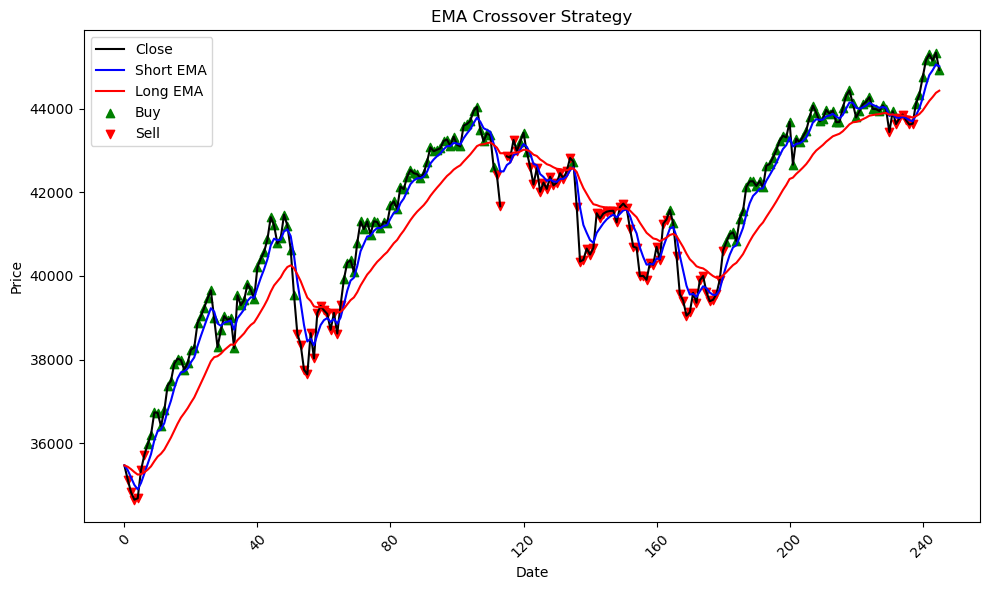

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the input variables
emaShortLength = 5
emaLongLength = 20
reward_ratio = 2  # Risk-reward ratio

# Read the data into a DataFrame (replace with your own data)
data = pd.read_csv('BN.csv')
Close = data['Close']

# Calculate the EMAs
emaShort = Close.ewm(span=emaShortLength, adjust=False).mean()
emaLong = Close.ewm(span=emaLongLength, adjust=False).mean()

# Generate buy and sell signals
buySignal = np.where(emaShort > emaLong, 1, 0)
sellSignal = np.where(emaShort < emaLong, 1, 0)

# Create a DataFrame for the signals
signals = pd.DataFrame({'Buy': buySignal, 'Sell': sellSignal}, index=data.index)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the closing prices
ax.plot(data.index, Close, color='black', label='Close')

# Plot the EMAs
ax.plot(data.index, emaShort, color='blue', label='Short EMA')
ax.plot(data.index, emaLong, color='red', label='Long EMA')

# Plot the buy and sell signals
ax.scatter(signals[signals['Buy'] == 1].index, Close[signals['Buy'] == 1], color='green', marker='^', label='Buy')
ax.scatter(signals[signals['Sell'] == 1].index, Close[signals['Sell'] == 1], color='red', marker='v', label='Sell')

# Set the x-axis tick spacing
ax.xaxis.set_major_locator(plt.MaxNLocator(8))

# Set the chart title and labels
ax.set_title('EMA Crossover Strategy')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Add a legend
ax.legend()

# Calculate potential target and stop-loss prices
trades = []
in_position = False
entry_price = 0
target_price = 0
stop_loss_price = 0

for i in range(len(data)):
    if signals['Buy'][i] == 1 and not in_position:
        in_position = True
        entry_price = Close[i]
        target_price = entry_price + (reward_ratio * (entry_price - stop_loss_price))
        stop_loss_price = entry_price - (entry_price - stop_loss_price)
        trades.append(('Buy', entry_price, target_price, stop_loss_price))
    elif signals['Sell'][i] == 1 and in_position:
        in_position = False
        exit_price = Close[i]
        trades.append(('Sell', exit_price))
        
# Print the trades with 1:2 risk-reward ratio
for trade in trades:
    if len(trade) == 4:
        entry_price, target_price, stop_loss_price = trade[1:]
        print(f'Entry: {entry_price}, Target: {target_price}, Stop Loss: {stop_loss_price}')
    else:
        exit_price = trade[1]
        print(f'Exit: {exit_price}')

# Display the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
